<a href="https://colab.research.google.com/github/Jhone-fori-freelancer/INGE-LEARN-4.0/blob/main/IA_Prediccion_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import random

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from PIL import Image

# 1. Analizar los datos

Ahora sí, vamos a cargar todas las herramientas para empezar a trabajar, para comenzar Keras y Tensorflow. Voy a cargar lo mínimo necesario para poder aunque sea VER una imagen

In [ ]:
# Matplotlib
plt.rc('figure', autolayout=True)
# Solamente es formato para que la imagen se vea linda
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

Ahora sí, cargamos los datasets

In [ ]:
drive_test = "https://drive.google.com/file/d/1hBoK0ONDI05BKZi3uO9S3Q6v-H0O9NsU/view?usp=sharing"
drive_train = "https://drive.google.com/file/d/1r7xj5Rq2Vtl_TDTgiDsgahM8-pJrk5w3/view?usp=sharing"

ruta_test = 'https://drive.google.com/uc?export=download&id='+drive_test.split('/')[-2]
ruta_train = 'https://drive.google.com/uc?export=download&id='+drive_train.split('/')[-2]

In [ ]:
test = pd.read_csv(ruta_test)
train = pd.read_csv(ruta_train)

# El "train" tiene una columna adicional. Las "Etiquetas"
# Esto sirve para entrenar el modelo.

train2 = train.drop('label',axis=1)
labels = train.pop('label')
# De paso, vemos qué tienen
train2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape,train.shape

((28000, 784), (42000, 784))

# 2. Evaluamos el proceso y preparamos los datos

Vamos a tratar de graficar algo. Primero tenemos que identificar que a cada fila (de 784 columnas/píxeles) en realidad corresponden a un cuadrado de 28x28

Lo que tenemos como una fila, en realidad es ésto:

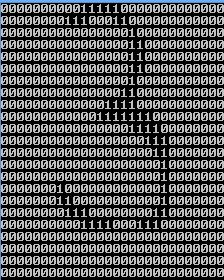

Train Data shape      : (28, 28, 1)
Test Data shape       : (28, 28, 1)


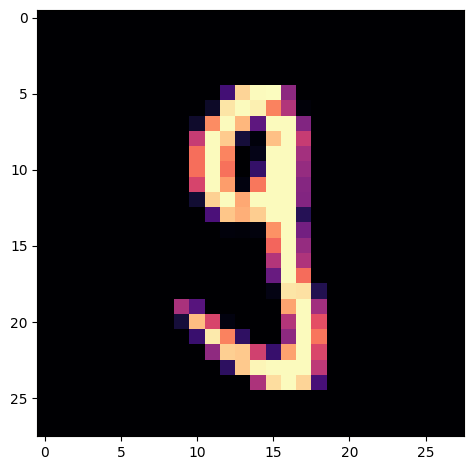

In [ ]:
# Reshape "reordena" los píxeles, de una sola fila de 784 valores,
# a una matriz de 28x28 píxeles.
x_train = train2.values[101].reshape( 28, 28, 1)
x_test  = test.values[101].reshape(28, 28, 1)

print('Train Data shape      :', x_train.shape)
print('Test Data shape       :', x_test.shape)

# Mostramos la imagen
plt.imshow(x_test)

Éxito! Ahora tratemos de graficar 1 número aleatorio, y ahora sí le damos forma al array. Tenemos que hacer reshape de TODO el dataset.


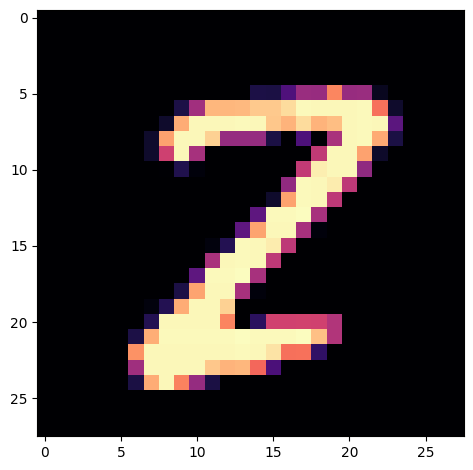

In [ ]:
test_RS = test.values.reshape(test.shape[0],28,28)
test_RS.shape

i = random.randint(0, test.shape[0])

plt.imshow(test_RS[i])

Con el train, tenemos que hacer lo mismo, pero ésta vez le tenemos que agregar la columna "label" que le sacamos

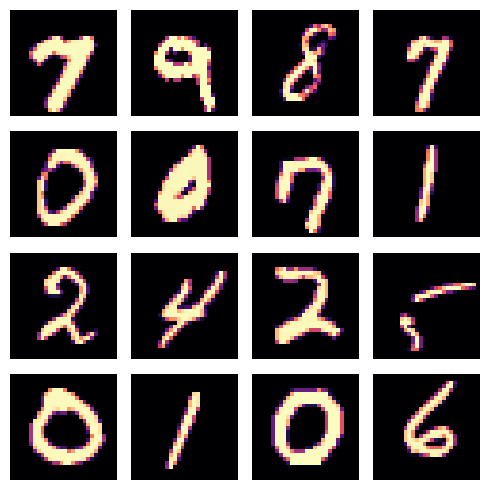

In [ ]:
train_RS = train2.values.reshape(train2.shape[0],28,28)
train_RS.shape

r = random.randint(0, train2.shape[0])


plt.figure(figsize=(5,5))
for i in range(16):
    r = random.randint(0, train2.shape[0])
    image = train_RS[r]
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
plt.show()



Definimos las variables para entrenamiento, y para testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_RS, labels, test_size=0.2, random_state=42)
X_train.shape,y_train.shape

((33600, 28, 28), (33600,))

# 3. Generar el modelo

definimos el modelo

In [ ]:
modelo = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

# 4. Entrenar el modelo

*-Musica de Rocky-* Entrenamos el modelo


In [ ]:
modelo.fit(
    X_train,y_train,
    epochs=20,
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7999 - loss: 0.6483
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9265 - loss: 0.2342
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9399 - loss: 0.1959
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9500 - loss: 0.1581
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9530 - loss: 0.1441
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9557 - loss: 0.1395
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9585 - loss: 0.1295
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9648 - loss: 0.1123
Epoch 9/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9631 - loss: 0.1142
Epoch 10/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9643 - loss: 0.1083
Epoch 11/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9668 - loss: 0.1031
Epoch 12/20
1050/1050 ━━━━━━━━

# 5. Realizar inferencias

Listo! A probar...

In [ ]:
test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 1s - 3ms/step - accuracy: 0.9757 - loss: 0.1057

Test accuracy: 0.9757142663002014


# 6. Crear predicciones

In [ ]:
# Con el modelo entrenado, usamos "Predict" para realizar
# nuestras predicciones, usando los datos de prueba
predicciones = modelo.predict(test_RS)

# Guardamos las predicciones en una variable llamada df2
df2 = pd.DataFrame(predicciones)
df2.head()

# Y probamos...

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,0,1,2,3,4,5,6,7,8,9
0,-9.681890,-8.581801,17.221264,4.464396,-10.632793,-12.801567,-7.576047,2.995636,-1.392892,-9.368433
1,9.940607,-4.652956,-0.471924,-5.227020,-12.123235,1.525469,-0.714458,-5.933765,-2.221953,-2.589394
2,-9.537230,-7.584174,-8.636113,-2.203721,1.764232,-3.106026,-6.716249,-0.047086,-1.288932,9.224037
3,3.178998,-10.627890,-0.380319,-1.686412,0.085397,-6.891587,-4.408689,-1.933823,-3.268837,6.693402
4,-7.847434,-1.365603,2.314600,9.046351,-8.531976,-0.771725,-10.121469,-5.015196,-0.837567,-2.457831


# 7. Procesar / Enviar / Mostrar los datos

El número que se identificó en la imagen es 2
-----------------
La imagen que el algoritmo vio es: 


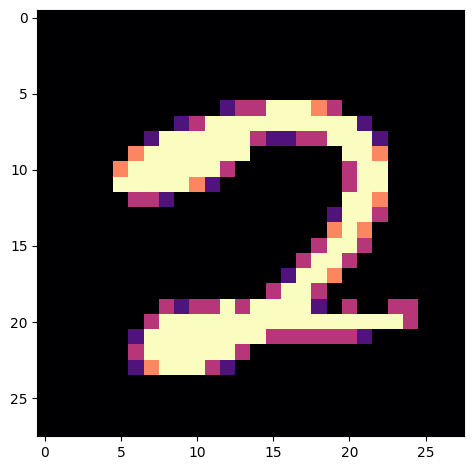

In [ ]:
# Seleccionamos una imagen random
i = random.randint(0, test.shape[0])

# Le decimos al algoritmo que prediga, y nos indique qué número es.
pred=pd.Series(predicciones[i])
print (f"El número que se identificó en la imagen es {pred.idxmax()}")
print("-----------------")
# y finalmente le pedimos a Python que grafique... A ver si es cierto
print("La imagen que el algoritmo vio es: ")
plt.imshow(test_RS[i])

# Probemos con una imagen generada en el momento

In [ ]:
# read an image
img = Image.open('/content/5.png')

# convert image object into array
matrizImagen = np.asarray(img)

foto = np.resize(matrizImagen[:,:,1], (1,28,28))
img

In [ ]:
# Comprobamos a ver si reconoce el número...

pr= modelo.predict(foto)
prediccion = pd.Series(pr[0])
prediccion.idxmax() #toma el número máximo de la serie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


5